# Examples

Some examples of how to use the anomaly agent.

<a target="_blank" href="https://colab.research.google.com/github/andrewm4894/anomaly-agent/blob/main/notebooks/examples.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

In [1]:
from IPython.display import Image, display
import pandas as pd
from anomaly_agent.utils import make_df, make_anomaly_config
from anomaly_agent.plot import plot_df_matplotlib as plot_df
from anomaly_agent import AnomalyAgent

pd.set_option("display.max_colwidth", None)

# set openai api key if not in environment
# os.environ['OPENAI_API_KEY'] = "<your-openai-api-key>"

In [2]:
# get and anomaly config to generate some dummy data
anomaly_cfg = make_anomaly_config()
print(anomaly_cfg)

# generate some dummy data
df = make_df(1000, 3, anomaly_config=anomaly_cfg)
df.head()

{'enabled': True, 'fraction': 0.02, 'methods': ['spike', 'drop', 'shift', 'noise'], 'spike_factor': 10, 'shift_value': 3, 'noise_std': 0.2}


,timestamp,var1,var2,var3
0,2020-01-01,0.001300,0.761092,0.818198
1,2020-01-02,NaN,0.700113,0.941763
2,2020-01-03,0.190090,0.404492,0.220129
3,2020-01-04,0.768491,0.082517,0.778014
4,2020-01-05,0.998749,0.084336,0.931580


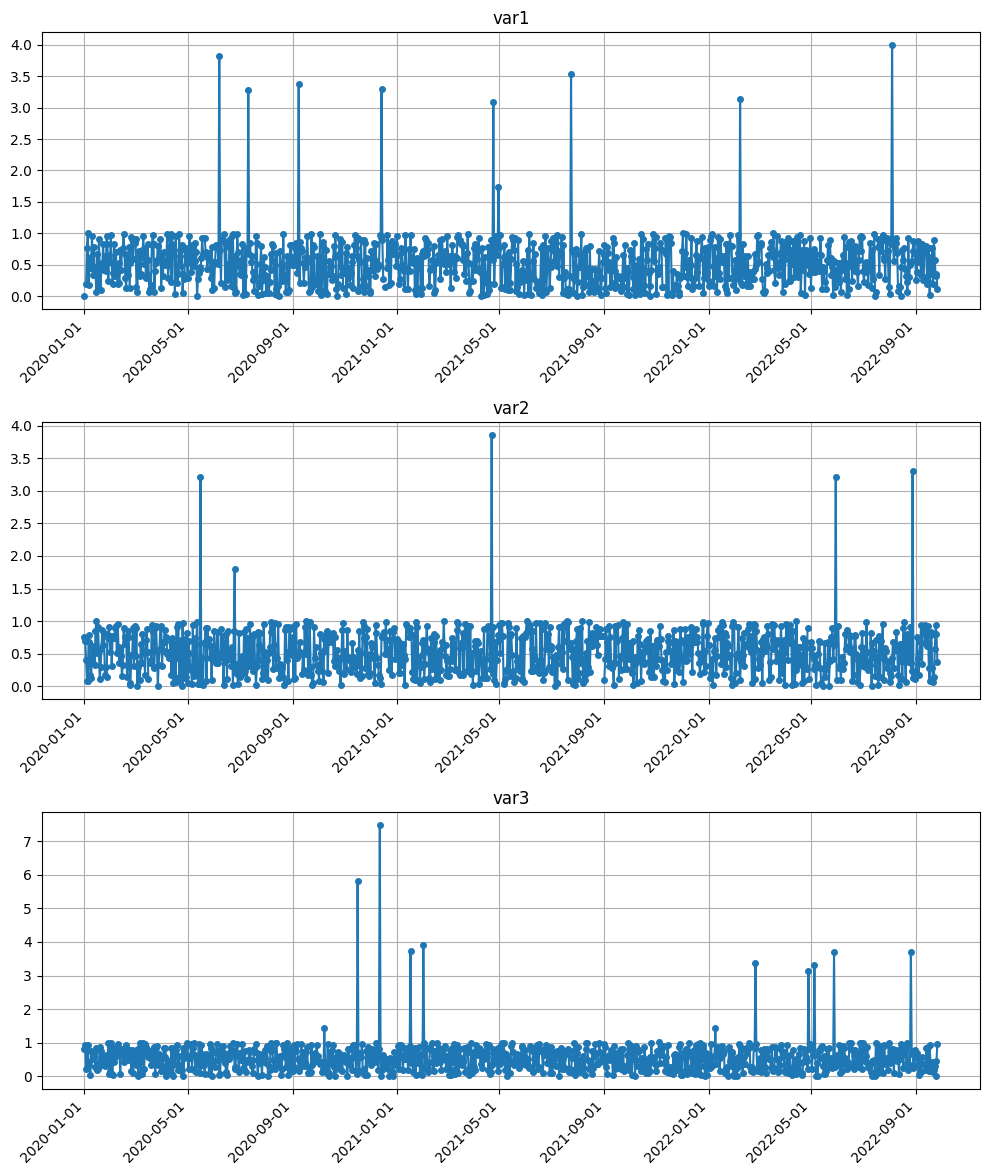

In [3]:
# plot the data
plot_df(df)

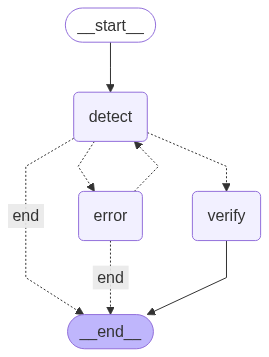

In [4]:
# create anomaly agent
anomaly_agent = AnomalyAgent(debug=True)

# Display the graph in Mermaid format
display(Image(anomaly_agent.app.get_graph().draw_mermaid_png()))

In [5]:
# detect anomalies
anomalies = anomaly_agent.detect_anomalies(df)

# print anomalies
print(anomalies)

2025-08-17 22:03:53,661 - anomaly_agent.agent.AnomalyAgent - DEBUG - Processing column: var1
2025-08-17 22:03:53,662 - anomaly_agent.agent.AnomalyAgent - DEBUG - Created state for var1, starting graph execution...
2025-08-17 22:03:53,707 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Processing var1
2025-08-17 22:04:44,076 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Found 5 anomalies, next step: verify
2025-08-17 22:04:55,978 - anomaly_agent.agent.AnomalyAgent - DEBUG - Graph execution completed for var1
2025-08-17 22:04:55,979 - anomaly_agent.agent.AnomalyAgent - DEBUG - Found 5 verified anomalies for var1
2025-08-17 22:04:55,980 - anomaly_agent.agent.AnomalyAgent - DEBUG - Processing column: var2
2025-08-17 22:04:55,980 - anomaly_agent.agent.AnomalyAgent - DEBUG - Created state for var2, starting graph execution...
2025-08-17 22:04:55,983 - anomaly_agent.nodes.DetectionNode - DEBUG - DetectionNode: Processing var2
2025-08-17 22:06:01,770 - anomaly_agent

{'var1': AnomalyList(anomalies=[Anomaly(timestamp='2020-05-12', variable_value=5e-06, anomaly_description='Extreme drop to near zero; value far below surrounding observations (neighboring values ~0.695 on 2020-05-11 and ~0.275 on 2020-05-13). Likely sensor error or data corruption.'), Anomaly(timestamp='2020-06-07', variable_value=3.816619, anomaly_description='Massive spike in var1; neighboring values around 0.51–0.73. Far outside typical range and not aligned with nearby observations. Isolated anomaly likely due to data error or sensor glitch.'), Anomaly(timestamp='2020-09-08', variable_value=3.3773, anomaly_description='Extreme spike in var1; neighbors ~0.522 before and ~0.202 after. Not part of regular pattern; likely measurement glitch or erroneous reading.'), Anomaly(timestamp='2021-04-24', variable_value=3.086881, anomaly_description='Spike not aligned with nearby values (0.579 on 2021-04-23 and 0.192 on 2021-04-25). Isolated; indicative of data issue or corruption.'), Anomaly(t

In [6]:
# get anomalies in long format
df_anomalies_long = anomaly_agent.get_anomalies_df(anomalies)
df_anomalies_long.sample(10)

,timestamp,variable_name,value,anomaly_description
4,2022-02-07,var1,3.141508,Sudden spike well above typical range (neighbors ~0.266 on 2022-02-06 and ~0.215 on 2022-02-08). Isolated anomaly likely due to data corruption or sensor error.
8,2020-10-08,var3,1.441860,Var3 reading exceeds typical 0-1 range; likely sensor overflow or data corruption. Validate against neighbors: 2020-10-07=0.171470 and 2020-10-09=0.404952.
16,2022-05-28,var3,3.691360,"Var3 spike (3.69) beyond typical range; likely data quality issue. Surrounding points: 2022-05-27=0.430270, 2022-05-29=0.276346."
3,2021-04-24,var1,3.086881,Spike not aligned with nearby values (0.579 on 2021-04-23 and 0.192 on 2021-04-25). Isolated; indicative of data issue or corruption.
6,2020-05-16,var2,3.210508,Statistical outlier: large spike in var2 well outside typical 0-1 range; next day returns to normal (05-17: 0.036215); likely sensor/readout error or transient anomaly.
2,2020-09-08,var1,3.377300,Extreme spike in var1; neighbors ~0.522 before and ~0.202 after. Not part of regular pattern; likely measurement glitch or erroneous reading.
0,2020-05-12,var1,0.000005,Extreme drop to near zero; value far below surrounding observations (neighboring values ~0.695 on 2020-05-11 and ~0.275 on 2020-05-13). Likely sensor error or data corruption.
13,2022-02-25,var3,3.377721,"Spike in Var3 (3.38) outside normal range; neighboring points: 2022-02-24=0.770174, 2022-02-26=0.890664."
18,2022-09-11,var3,0.000000,Missing value for Var3 (NaN) at this timestamp; data quality issue requiring imputation or re-collection.
9,2020-11-16,var3,5.823283,Extreme spike in Var3 far above normal; probable sensor fault or data corruption. Check surrounding context: 2020-11-15=0.077797 and 2020-11-17=0.092445.


In [7]:
# get anomalies in wide format
df_anomalies_wide = anomaly_agent.get_anomalies_df(anomalies, format="wide")
df_anomalies_wide.sample(10)

variable_name,timestamp,var1,var2,var3,var1_description,var2_description,var3_description
7,2020-12-12,NaN,NaN,7.489251,NaN,NaN,"Extreme spike in Var3 (7.49) indicating data quality issue; likely sensor malfunction. Adjacent values: 2020-12-11=0.173610, 2020-12-13=0.015987."
14,2022-02-25,NaN,NaN,3.377721,NaN,NaN,"Spike in Var3 (3.38) outside normal range; neighboring points: 2022-02-24=0.770174, 2022-02-26=0.890664."
8,2021-01-12,NaN,NaN,0.000000,NaN,NaN,Missing value for Var3 (NaN) at this timestamp; data quality issue requiring imputation or re-collection.
1,2020-05-12,0.000005,NaN,NaN,Extreme drop to near zero; value far below surrounding observations (neighboring values ~0.695 on 2020-05-11 and ~0.275 on 2020-05-13). Likely sensor error or data corruption.,NaN,NaN
12,2021-11-04,NaN,NaN,1.032556,NaN,NaN,"Var3 >1; out of typical range indicating data-quality issue. Nearby values: 2021-11-03=0.667876, 2021-11-05=0.392623."
9,2021-02-01,NaN,NaN,3.910802,NaN,NaN,"Var3 spike outside typical 0-1 range; potential measurement error or data corruption. Neighboring points: 2021-01-31=0.290171, 2021-02-02=0.978215."
0,2020-03-27,NaN,0.003133,NaN,NaN,"Statistical outlier: extremely low value in var2 relative to surrounding observations (03-26: 0.540401, 03-28: 0.332163); likely measurement error or data issue.",NaN
17,2022-05-28,NaN,NaN,3.691360,NaN,NaN,"Var3 spike (3.69) beyond typical range; likely data quality issue. Surrounding points: 2022-05-27=0.430270, 2022-05-29=0.276346."
5,2020-10-08,NaN,NaN,1.441860,NaN,NaN,Var3 reading exceeds typical 0-1 range; likely sensor overflow or data corruption. Validate against neighbors: 2020-10-07=0.171470 and 2020-10-09=0.404952.
10,2021-04-22,NaN,3.856587,NaN,NaN,Statistical outlier: another large spike in var2; followed by return to normal (2021-04-23: 0.691222); not part of regular seasonal behavior; likely data error or transient event.,NaN


In [8]:
# merge anomalies with original data
df_final = df.merge(
    df_anomalies_wide,
    on="timestamp",
    how="left",
    suffixes=("", "_anomaly_flag"),
)

df_final.head()

,timestamp,var1,var2,var3,var1_anomaly_flag,var2_anomaly_flag,var3_anomaly_flag,var1_description,var2_description,var3_description
0,2020-01-01,0.001300,0.761092,0.818198,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-02,NaN,0.700113,0.941763,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-03,0.190090,0.404492,0.220129,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-04,0.768491,0.082517,0.778014,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-05,0.998749,0.084336,0.931580,NaN,NaN,NaN,NaN,NaN,NaN


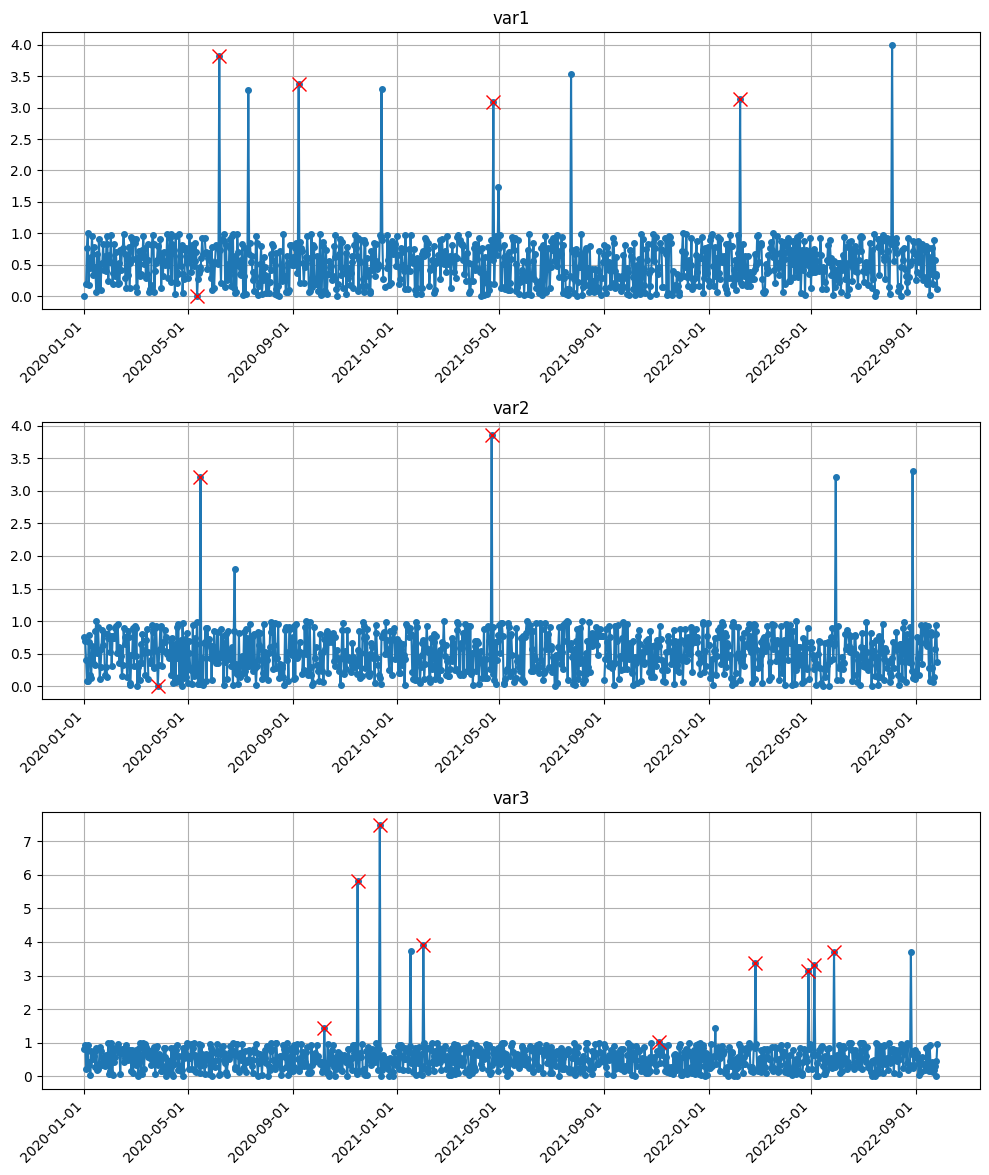

In [9]:
# plot final data with anomalies
plot_df(df_final)